In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import psutil
from functools import reduce
from tqdm import tqdm_notebook
from multiprocessing import Process
import gen_features
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Split and save 9+Gb dataset into more manageable csv chunks

In [112]:
# Split training data into more manageable chunks of size = chunksize
sample_size = int(1.5e5)
chunksize = 30*sample_size
reader = pd.read_csv(os.path.join("Data","train.csv"),chunksize=chunksize)

data_list = []
steps = []
for i, chunk in enumerate(reader):
    print(i,end=', ')
    print(chunk.index[0],end=', ')
    steps.append(chunk.index[-1])
    if "train_chunk{0}.csv".format(i+1) not in os.listdir("Data"):
        if len(steps)>2:
            print(steps[-1]-steps[-2],end=', ')
            
        chunk.to_csv(os.path.join("Data","train_chunk{0}.csv".format(i+1)))
    del chunk
    print("Converted to csv chunk")

0, 0, Converted to csv chunk
1, 4500000, Converted to csv chunk
2, 9000000, Converted to csv chunk
3, 13500000, Converted to csv chunk
4, 18000000, Converted to csv chunk
5, 22500000, Converted to csv chunk
6, 27000000, Converted to csv chunk
7, 31500000, Converted to csv chunk
8, 36000000, Converted to csv chunk
9, 40500000, Converted to csv chunk
10, 45000000, Converted to csv chunk
11, 49500000, Converted to csv chunk
12, 54000000, Converted to csv chunk
13, 58500000, Converted to csv chunk
14, 63000000, Converted to csv chunk
15, 67500000, Converted to csv chunk
16, 72000000, Converted to csv chunk
17, 76500000, Converted to csv chunk
18, 81000000, Converted to csv chunk
19, 85500000, Converted to csv chunk
20, 90000000, Converted to csv chunk
21, 94500000, Converted to csv chunk
22, 99000000, Converted to csv chunk
23, 103500000, Converted to csv chunk
24, 108000000, Converted to csv chunk
25, 112500000, Converted to csv chunk
26, 117000000, Converted to csv chunk
27, 121500000, C

In [113]:
### Read training sets and confirm indices
read_chunks = list(range(1,141))
data_list = []
steps = []
data_y_range = []
for k in tqdm_notebook(read_chunks):
    data = pd.read_csv(os.path.join("Data","train_chunk{0}.csv".format(k)))
    steps.append(data.iloc[0,0])
    data_y_range.append(data['time_to_failure'].max()-data['time_to_failure'].min())
#     data_list.append(data.iloc[::10000,:])
    print(k,end='\r')

140


In [114]:
d_steps = np.diff(steps)
np.unique(d_steps)

array([4500000], dtype=int64)

### Read in training data chunks at every 1000 steps and plot entire dataset

In [5]:
### Read specific chunks of training data
read_chunks = list(range(1,141))
data_list = []
folder = "temp"
filename = 'text.txt'
if "train_resample1000.csv" not in os.listdir("Features"):
    for k in tqdm_notebook(read_chunks):
        p = Process(target=gen_features.truncate_data,args=(k,))
        p.start()
        p.join()
        if k%20 == 0:
            with open(os.path.join(folder,filename),'r') as file:
                print(file.read())
    data = pd.concat([pd.read_csv(os.path.join("temp","truncated_chunk{0}.csv".format(k)),
                              index_col=0,usecols=[1,2,3]) for k in read_chunks])
    data.to_csv(os.path.join("Features","train_resample1000.csv"))
else:
    data = pd.read_csv(os.path.join("Features","train_resample1000.csv"),index_col=0)

In [6]:
data.tail()

,acoustic_data,time_to_failure
629141000,0,9.760796
629142000,4,9.759799
629143000,8,9.759798
629144000,12,9.759797
629145000,11,9.759796


In [10]:
ax1.

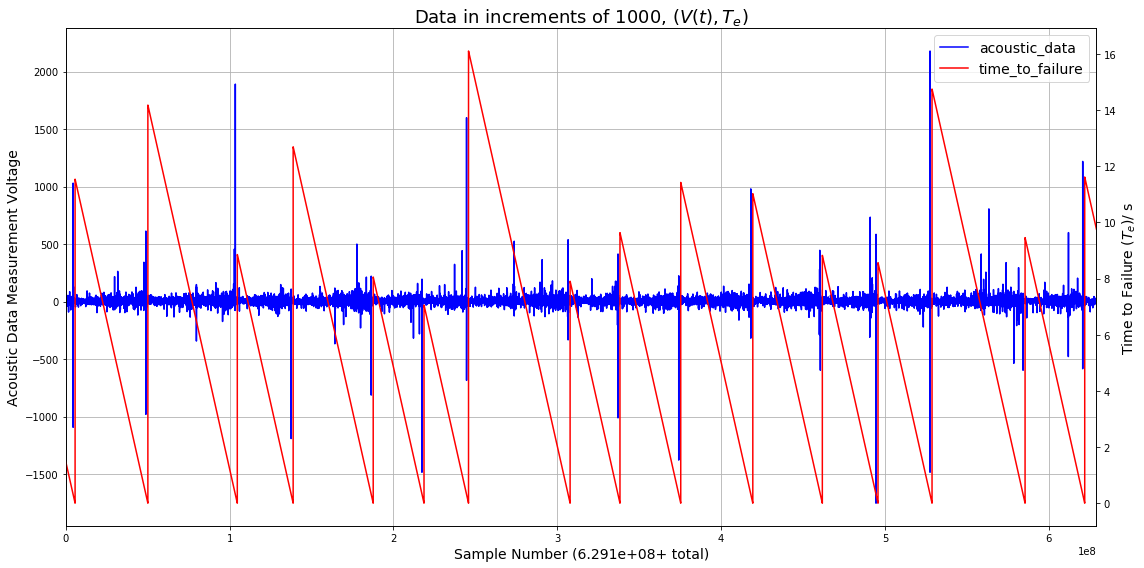

In [20]:
start = 0
stop = -1

fig, ax1 = plt.subplots(figsize=(16,8))
ln1 = ax1.plot(data['acoustic_data'].iloc[start:stop],'b',label = 'acoustic_data')
ax2 = ax1.twinx()
ln2 = ax2.plot(data['time_to_failure'],'r',label = 'time_to_failure')
ax1.legend(ln1+ln2,data.columns.values,fontsize=14)
ax1.grid(which='both')
ax1.set_ylabel('Acoustic Data Measurement Voltage',fontsize=14)
ax2.set_ylabel(r'Time to Failure $(T_e)$/ s',fontsize=14)
# ax2.set_ylim((0,12))
ax1.set_xlim((data.index[start],data.index[stop]))
ax1.set_title(r'Data in increments of 1000, $(V(t), T_e)$',fontsize=18)
ax1.set_xlabel(r'Sample Number ({:.3e}+ total)'.format(data.index[stop]),fontsize=14)
# for k in range(0,data.index[-1],30*150000):
#     ax1.axvline(k,color='k',linestyle='--')
plt.tight_layout()
plt.savefig("project_proposal_2")

In [31]:
data.index.values[start:stop].shape

(629145,)

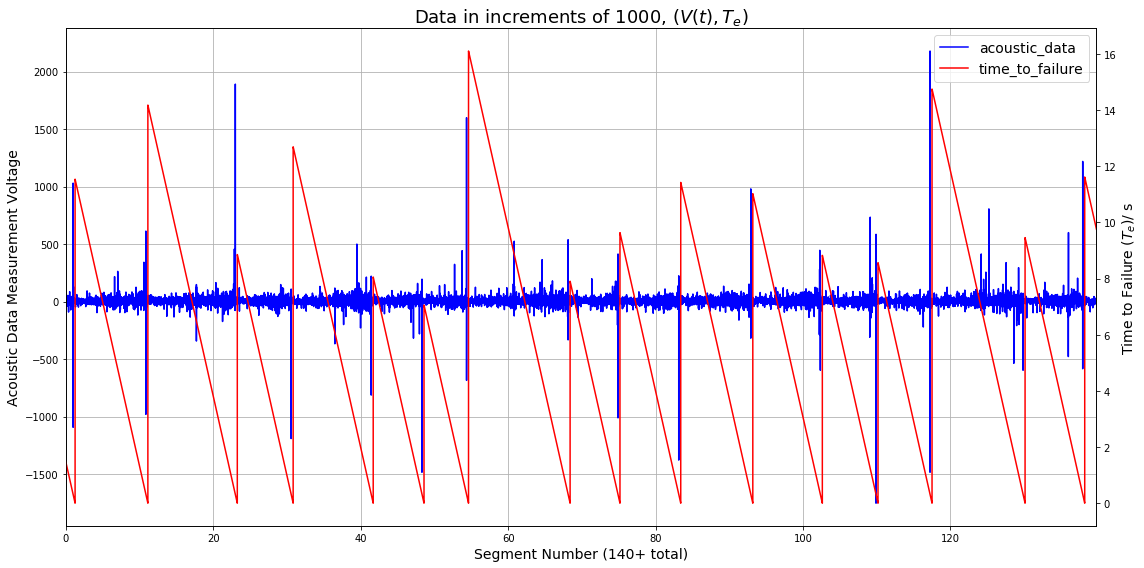

In [39]:
start = 0
stop = -1

fig, ax1 = plt.subplots(figsize=(16,8))
ln1 = ax1.plot(data.index[start:stop]/150000/30,data['acoustic_data'].iloc[start:stop],'b',label = 'acoustic_data')
ax2 = ax1.twinx()
ln2 = ax2.plot(data.index[start:stop]/150000/30,data['time_to_failure'].iloc[start:stop],'r',label = 'time_to_failure')
ax1.legend(ln1+ln2,data.columns.values,fontsize=14)
ax1.grid(which='both')
ax1.set_ylabel('Acoustic Data Measurement Voltage',fontsize=14)
ax2.set_ylabel(r'Time to Failure $(T_e)$/ s',fontsize=14)
# ax2.set_ylim((0,12))
ax1.set_xlim((data.index[start]/150000/30,data.index[stop]/150000/30))
ax1.set_title(r'Data in increments of 1000, $(V(t), T_e)$',fontsize=18)
ax1.set_xlabel(r'Segment Number ({:.0f}+ total)'.format(data.index[stop]/150000/30),fontsize=14)
# for k in range(0,data.index[-1],30*150000):
#     ax1.axvline(k,color='k',linestyle='--')
plt.tight_layout()

### Read in data chunks and create description of entire dataset

In [118]:
read_chunks = list(range(1,141))
folder = "temp"
filename = 'text.txt'
for k in tqdm_notebook(read_chunks):
    p = Process(target=gen_features.data_describe,args=(k,))
    p.start()
    p.join()
    if k%20 == 0:
        with open(os.path.join(folder,filename),'r') as file:
            print(file.read())

Ppid: 15316
Pid: 10120
k = 20
Memory use = 64.3%

Ppid: 15316
Pid: 10232
k = 40
Memory use = 64.2%

Ppid: 15316
Pid: 6344
k = 60
Memory use = 64.4%

Ppid: 15316
Pid: 10564
k = 80
Memory use = 64.9%

Ppid: 15316
Pid: 15348
k = 100
Memory use = 64.5%

Ppid: 15316
Pid: 6756
k = 120
Memory use = 63.1%

Ppid: 15316
Pid: 14072
k = 140
Memory use = 62.7%




In [119]:
# Get data.describe details for all the entire dataset by calculating 
# the describe function for each of the chunks
desc_list = []
for k in tqdm_notebook(read_chunks):
    desc_list.append(pd.read_csv(os.path.join("temp","describe_chunk{0}.csv".format(k)),index_col=0))

In [120]:
total_desc = {}
total_desc['count'] = reduce(lambda x,y: x + y.loc['count'],desc_list,0)
total_desc['mean'] = reduce(lambda x,y: x + y.loc['mean']*y.loc['count'],
                            desc_list,0)/total_desc['count']
total_desc['min'] = reduce(lambda x,y: np.minimum(x,y.loc['min']),desc_list,np.inf)
total_desc['max'] = reduce(lambda x,y: np.maximum(x,y.loc['max']),desc_list,-np.inf)
total_desc['std'] = np.sqrt(1/total_desc['count'] * np.sum(
    [x.loc['count']*x.loc['std']**2 + x.loc['count']*(x.loc['mean']-total_desc['mean'])**2
    for x in desc_list],axis = 0))

In [121]:
pd.DataFrame(total_desc).T

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
min,-5.515000e+03,9.550396e-05
max,5.444000e+03,1.610740e+01
std,1.073571e+01,3.672697e+00


### Plot example of a single datapoint

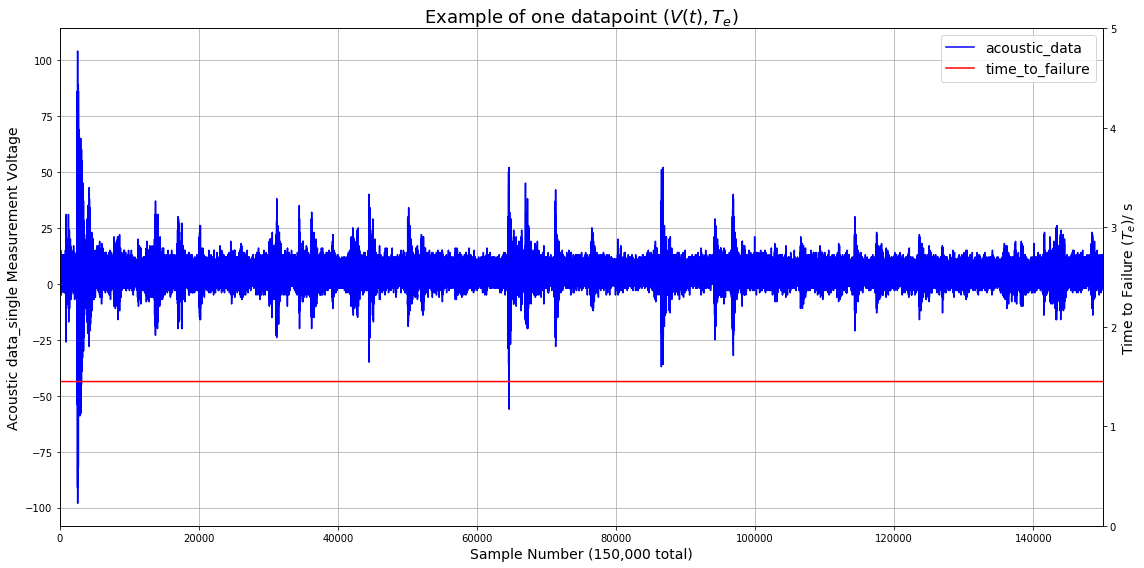

In [128]:
# Plot 1 of the samples
sample_size = 150000
data_single = pd.read_csv(os.path.join("Data","train_chunk1.csv")).iloc[:,1:]
start = 0 #10*sample_size
stop = sample_size

fig, ax1 = plt.subplots(figsize=(16,8))
ln1 = ax1.plot(data_single['acoustic_data'].iloc[start:stop],'b',label = 'acoustic_data')
ax2 = ax1.twinx()
ln2 = ax2.plot(data_single['time_to_failure'].iloc[start:stop].mean()*np.ones(data_single.shape[0]),'r',label = 'time_to_failure')
ax1.legend(ln1+ln2,data_single.columns.values,fontsize=14)
ax1.grid(which='both')
ax1.set_ylabel('Acoustic data_single Measurement Voltage',fontsize=14)
ax2.set_ylabel(r'Time to Failure $(T_e)$/ s',fontsize=14)
ax2.set_ylim((0,5))
ax1.set_xlim((start,stop))
ax1.set_title(r'Example of one datapoint $(V(t), T_e)$',fontsize=18)
ax1.set_xlabel(r'Sample Number (150,000 total)',fontsize=14)
plt.tight_layout()
plt.savefig("project_proposal_1")